In [1]:
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.palettes import Category10
from IPython.display import Image



# Summary of my bioinformatics pipeline from raw illumina data to population genetics analyses

Molecular genetic data was collected from DNA samples from 180 <i>Ambrosia artemisiifolia</i> plants. GBS library prep was conducted in the Hodgins lab at Monash University and DNA libraries were sent to Genome Quebec for sequencing on an Illumina HiSeq 2500. 

## Initial input

Ragweed_R1_001.fastq, Ragweed_R1_002.fastq

## Demultiplexing

*program* 
stacks

*code*
process_radtags -P -p ./raw -b ./barcodes/stacks_barcodes_win.txt -o ./samples -r --inline_inline --renz_1 pstI --renz_2 mspI

*output*
sampleName1.fq.gz, sampleName2.fq.gz for each sample

## Quality check

*program* fastqc

*code* ./fastqc sample

*output*

| First file| |
| --- | --- |
| Filename | Ragweed_R1_001.fastq | 
| File type | Conventional base calls |
| Encoding | Sanger / Illumina 1.9 |
| Total Sequences | 250033952 |
| Sequences flagged as poor quality | 0 | 
| Sequence length | 125 | 
| %GC | 43 |

| Second file| |
| --- | --- |
| Filename | Ragweed_R2_001.fastq |
| File type | Conventional base calls |
| Encoding | Sanger / Illumina 1.9 |
| Total Sequences | 250033952 | 
| Sequences flagged as poor quality | 0 | 
| Sequence length | 125 | 
| %GC | 44 |


## Convert from fq.gz to sam

*program* bowtie + shell script (bash)

*code* -- saved on grandiflora

```bash
names='A1I A10I A11I A12I A2I A3I A4I A5I A6I A7I A8I A9I B1I B10I B11I B12I B2I B3I B4I B5I B6I B7I B8I B9I C1I C10I C11I C12I C2I C3I C4I C5I C6I C7I C8I C9I D1I D10I D11I D12I D2I D3I D4I D5I D6I D7I D8I D9I E1I E10I E11I E12I E2I E3I E4I E5I E6I E7I E8I E9I F1I F10I F11I F12I F2I F3I F4I F5I F6I F7I F8I F9I G1I G10I G11I G12I G2I G3I G4I G5I G6I G7I G8I G9I H1I H10I H11I H12I H2I H3I H4I H5I H6I H7I H8I H9I A1II A10II A11II A2II A3II A4II A5II A6II A7II A8II A9II B1II B10II B11II B2II B3II B4II B5II B6II B7II B8II B9II C1II C10II C11II C2II C3II C4II C5II C6II C7II C8II C9II D1II D10II D11II D2II D3II D4II D5II D6II D7II D8II D9II E1II E10II E2II E3II E4II E5II E6II E7II E8II E9II F1II F10II F2II F3II F4II F5II F6II F7II F8II F9II G1II G10II G2II G3II G4II G5II G6II G7II G8II G9II H1II H10II H2II H3II H4II H5II H6II H7II H8II H9II'


for name in $names
do
   echo try $name
   in_one=$name'.1.fq.gz'
  # echo $in_one
   in_two=$name'.2.fq.gz'
  # echo $in_two
   out_file=$name'.sam'
  # echo $out_file
  /gran1/brechann.mcgoey/bowtie2-2.3.4.1/bowtie2 -x ragweed_index -1 $in_one -2 $in_two -S $out_file
  
  done
echo All done
```
  
 *ouput
 .sam files for each sample

## Convert from sam to bam and then to sorted bam files

*program* samtools using shell script (bash)

*code*
```bash
#!/bin/bash

names='A1I A10I A11I A12I A2I A3I A4I A5I A6I A7I A8I A9I B1I B10I B11I B12I B2I B3I B4I B5I B6I B7I B8I B9I C1I C10I C11I C12I C2I C3I C4I C5I C6I C7I C8I C9I D1I D10I D11I D12I D2I D3I D4I D5I D6I D7I D8I D9I E1I E10I E11I E12I E2I E3I E4I E5I E6I E7I E8I E9I F1I F10I F11I F12I F2I F3I F4I F5I F6I F7I F8I F9I G1I G10I G11I G12I G2I G3I G4I G5I G6I G7I G8I G9I H1I H10I H11I H12I H2I H3I H4I H5I H6I H7I H8I H9I A1II A10II A11II A2II A3II A4II A5II A6II A7II A8II A9II B1II B10II B11II B2II B3II B4II B5II B6II B7II B8II B9II C1II C10II C11II C2II C3II C4II C5II C6II C7II C8II C9II D1II D10II D11II D2II D3II D4II D5II D6II D7II D8II D9II E1II E10II E2II E3II E4II E5II E6II E7II E8II E9II F1II F10II F2II F3II F4II F5II F6II F7II F8II F9II G1II G10II G2II G3II G4II G5II G6II G7II G8II G9II H1II H10II H2II H3II H4II H5II H6II H7II H8II H9II'

for name in $names
do
   echo try $name
   in_sam=$name'.sam'
  # echo $in_sam
   out_bam=$name'.bam'
  # echo $out_bam
   out_file=$name'.sorted.bam'
  # echo $out_file

samtools view -S -b $in_sam > $out_bam
samtools sort $out_bam -o $out_file

done

echo All done
```

*output* 
a sorted bam file for each sample

## Check depth

*program* samtools using shell (bash) and python scripts

*code*

```bash
#!/bin/sh

names_test='A12I A2I'

names='A3I A4I A5I A6I A7I A8I A9I B1I B10I B11I B12I B2I B3I B4I B5I B6I B7I B8I B9I C1I C10I C11I C12I C2I C3I C4I C5I C6I C7I C8I C9I D1I D10I D11I D12I D2I D3I D4I D5I D6I D7I D8I D9I E1I E10I E11I E12I E2I E3I E4I E5I E6I E7I E8I E9I F1I F10I F11I F12I F2I F3I F4I F5I F6I F7I F8I F9I G1I G10I G11I G12I G2I G3I G4I G5I G6I G7I G8I G9I H1I H10I H11I H12I H2I H3I H4I H5I H6I H7I H8I H9I A1II A10II A11II A2II A3II A4II A5II A6II A7II A8II A9II B1II B10II B11II B2II B3II B4II B5II B6II B7II B8II B9II C1II C10II C11II C2II C3II C4II C5II C6II C7II C8II C9II D1II D10II D11II D2II D3II D4II D5II D6II D7II D8II D9II E1II E10II E2II E3II E4II E5II E6II E7II E8II E9II F1II F10II F2II F3II F4II F5II F6II F7II F8II F9II G1II G10II G2II G3II G4II G5II G6II G7II G8II G9II H1II H10II H2II H3II H4II H5II H6II H7II H8II H9II'

for name in $names
do
   echo try $name
   in_bam=$name'.sorted.bam'
   echo $in_sam
   out_txt=$name'.txt'
   echo $out_txt

samtools depth -a $in_bam >$out_txt

python depth.py $out_txt

rm $out_txt

done

echo All done
```

``` python
#!/usr/bin/python

import sys
print (sys.argv[1])
filepath = sys.argv[1]

sumit=0
listit=[]
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        num=int(line.strip()[-1])
        if num>0:
            listit.append(num)
        #print(num)
        #print("Line {}: {}".format(cnt, line.strip()))
        line = fp.readline()
        cnt += 1
        sumit +=num


f = open("Test.txt", "a")
print (f)

value=('id',filepath,'num',num,'count',(cnt-1),'sumit',sumit,'average',sumit/(cnt-1),'sum_list',sum(listit),'len_list',len(listit))

myString = str(value)

f.write(myString)

f.close()
```

*output*

Test.txt

## Snp filtering using vcf tools

**Three parameters:** 
minor allele count (mac), hardy-weinberg equilibrium p value cutoff (hwe), max missing (maxmiss)

Ranges used here for plots

**mac:** 3, 4, 5, 6 (equivalent to 1.7%, 2.2%, 2.8%, 3.3%) 

**hwe:** 1e-3, 1e-4, 1e-5, 1e-6 (old set --> 0.1, 0.05, 0.01, 0.001)

**maxmiss:** 0.5, 0.6, 0.7, 0.8, 0.9 (note this is inverted i.e. 0.9 means only 10% can be missing for that snp)
*from vcf manual:*
"Exclude sites on the basis of the proportion of missing data (defined to be between 0 and 1, where 0 allows sites that are completely missing and 1 indicates no missing data allowed)."

### Minimum allele count in literature

1% (Beck et al. 2015, McGrath 2007, Sawler et al. 2015)
2% (Huang et al. 2014)
5% (Mondon et al. 2017)



### Hardy weinberg cutoff in literature

"The significance threshold for declaring SNPs to be in Hardy-Weinberg equilibrium has varied greatly between studies (p-value thresholds between 0.001 and 5.7 × 10−7 have been reported in the literature3,19)."
Anderson et al. 2010

### Max missing setting in literature
0.5 (Martin et al. 2016)

0.7 (Beck et al 2015., IIlut et al. 2015, McGrath et al. ) 

0.8 (Taylor et al. 2014, Mondon et al. 2017, Sawler et al. 2015) 


n.b. Martin et al. was a study on ragweed

### I went with

Mac 4

Hwe 1e-5

Max-missing 0.8

### With no MAC
Very rare alleles can be important for population STRUCTURE (Linck & Battey 2017). Because ot this I also redid filtering keeping HWE and Max-missing the same, but not excluding any based on MAC. In my case, STRUCTURE results were unaffected.

### Reference Genome using snps

In [2]:
# 1 - Initialize list containing your 'macs'
macs = []
# 2 - Initialize list containing your 'hwes'
hwes = []
#3 - Initialize list containing your 'max-missing'
maxmiss=[]
#4 - Initialize list containing your 'max-missing'
kept=[]

In [3]:
# Opening file for reading. The path of the file is given in argument
open_file = open('data/all_vcf_new.txt', 'r')

In [4]:
for line in open_file:
    # 'line' is a line in your file

    # We make sure that 'line' is non-empty
    if line:
        # for each line in your file, we read something like this: 
        # subject---marks
        # We need to split the different information, which are separated by '---'
        information = line.split()

        # 'information' is an array containing 2 values:
        # 'information[0]' contains the subject
        # 'information[1]' contains the mark

        # We store each separate information in our arrays 'subjects' and 'marks':
        macs.append(information[16])
        hwes.append(information[20])
        maxmiss.append(information[22])
        kept.append(information[38])
        

# When finishing reading the file, we close it    
open_file.close()

In [5]:
vcf_output = pd.DataFrame(
    {'minor_allele_count': macs,
     'hw_pvalue': hwes,
     'max_missing': maxmiss,
     'number_kept': kept 
    })

In [6]:
#vcf_output

In [7]:
vcf3=vcf_output[vcf_output["minor_allele_count"]=="3"]
vcf4=vcf_output[vcf_output["minor_allele_count"]=="4"]
vcf5=vcf_output[vcf_output["minor_allele_count"]=="5"]
vcf6=vcf_output[vcf_output["minor_allele_count"]=="6"]

In [8]:
palette=Category10[7]
d_palette={'0.001':palette[1],'0.0001':palette[2],'1e-05':palette[3],'1e-06':palette[4]}

In [9]:
p1=figure(title="Reference Genome", width=900, height=600)
p1.circle(vcf3['max_missing'],vcf3['number_kept'],color=vcf3['hw_pvalue'].apply(lambda x:d_palette[x]),size=20)


bokeh.models.renderers.GlyphRenderer(
    id='9312f259-fd6c-4597-b89f-3098129ce876',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='c526591b-e860-43fa-b15b-bd35b8ce5542',
        callback=None,
        data={'fill_color': ['#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd'],
         'line_color': ['#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd'],
         'x': ['0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9',
          '0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9',
          '0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9',
          '0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9'],
         'y': ['34536',
          '30366',
          '25821',
          '19845',
          '9083',
          '42936',
          '37284',
          '30884',
          '23231',
          '10171',
          '50173',
          '42942',
          '35314',
          '26133',
          '10951',
          '56971',
          '48345',
          '39002',
          '28414',
          '11414']},
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        selected=bokeh.models.selections.Selection(
            id='241871f5-1107-447c-9ab4-df395cbc5cd7',
            indices=[],
            js_event_callbacks={},
            js_property_callbacks={},
            line_indices=[],
            multiline_indices={},
            name=None,
            subscribed_events=[],
            tags=[]),
        selection_policy=bokeh.models.selections.UnionRenderers(
            id='c1dd061e-3d54-4c49-bb5d-095bbdf726b1',
            js_event_callbacks={},
            js_property_callbacks={},
            name=None,
            subscribed_events=[],
            tags=[]),
        subscribed_events=[],
        tags=[]),
    glyph=bokeh.models.markers.Circle(
        id='71d3950e-a67d-475a-bbe6-2b1f713eddc2',
        angle={'units': 'rad', 'value': 0.0},
        fill_alpha={'value': 1.0},
        fill_color={'field': 'fill_color'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 1.0},
        line_cap='butt',
        line_color={'field': 'line_color'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension='x',
        size={'units': 'screen', 'value': 20},
        subscribed_events=[],
        tags=[],
        x={'field': 'x'},
        y={'field': 'y'}),
    hover_glyph=None,
    js_event_callbacks={},
    js_property_callbacks={},
    level='glyph',
    muted=False,
    muted_glyph=None,
    name=None,
    nonselection_glyph=bokeh.models.markers.Circle(
        id='d27fbfed-94ea-4bf1-acfc-4842350c3a48',
        angle={'units': 'rad', 'value': 0.0},
        fill_alpha={'value': 0.1},
        fill_color={'value': '#1f77b4'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 0.1},
        line_cap='butt',
        line_color={'value': '#1f77b4'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension=

In [14]:
#output_notebook()
#show(p1)

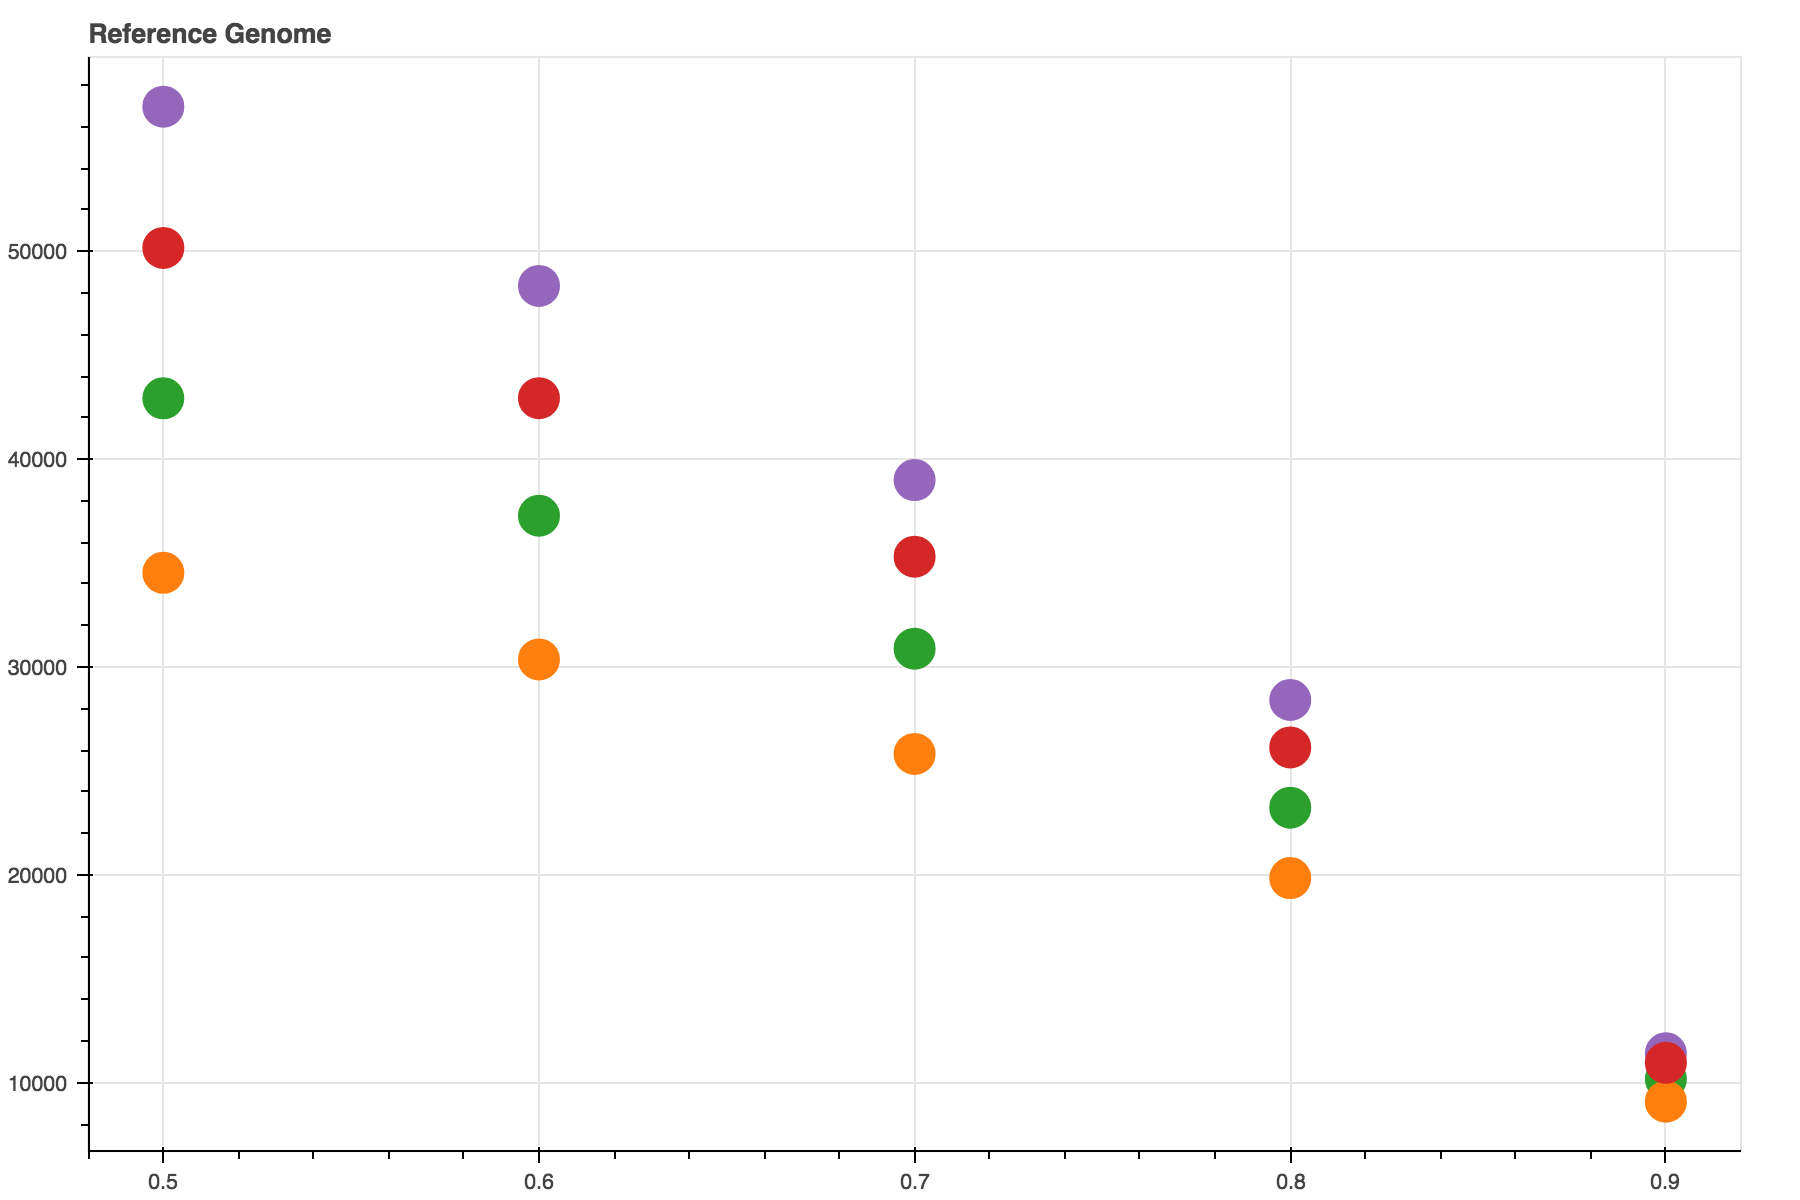

In [15]:
Image('images/bokeh_plot1.png')

### Denovo

Original number of sites: 215359

In [16]:
# 1 - Initialize list containing your 'macs'
macs = []
# 2 - Initialize list containing your 'hwes'
hwes = []
#3 - Initialize list containing your 'max-missing'
maxmiss=[]
#4 - Initialize list containing your 'max-missing'
kept=[]

In [19]:
# Opening file for reading. The path of the file is given in argument
open_file = open('data/all_vcf_new_denovo.txt', 'r')

In [20]:
for line in open_file:
    # 'line' is a line in your file

    # We make sure that 'line' is non-empty
    if line:
        # for each line in your file, we read something like this: 
        # subject---marks
        # We need to split the different information, which are separated by '---'
        information = line.split()

        # 'information' is an array containing 2 values:
        # 'information[0]' contains the subject
        # 'information[1]' contains the mark

        # We store each separate information in our arrays 'subjects' and 'marks':
        macs.append(information[16])
        hwes.append(information[20])
        maxmiss.append(information[22])
        kept.append(information[38])
        

# When finishing reading the file, we close it    
open_file.close()


In [21]:
vcf_output = pd.DataFrame(
    {'minor_allele_count': macs,
     'hw_pvalue': hwes,
     'max_missing': maxmiss,
     'number_kept': kept 
    })

In [22]:
#vcf_output

In [23]:
vcf001=vcf_output[vcf_output["hw_pvalue"]=="0.001"]

In [24]:
vcf0001=vcf_output[vcf_output["hw_pvalue"]=="0.0001"]

In [25]:
vcf1e5=vcf_output[vcf_output["hw_pvalue"]=="1e-05"]

In [26]:
vcf1e6=vcf_output[vcf_output["hw_pvalue"]=="1e-06"]

In [27]:
vcf3=vcf_output[vcf_output["minor_allele_count"]=="3"]
vcf4=vcf_output[vcf_output["minor_allele_count"]=="4"]
vcf5=vcf_output[vcf_output["minor_allele_count"]=="5"]
vcf6=vcf_output[vcf_output["minor_allele_count"]=="6"]

In [28]:
palette=Category10[7]
d_palette={'0.001':palette[1],'0.0001':palette[2],'1e-05':palette[3],'1e-06':palette[4]}

In [29]:
p2=figure(title="Denovo", width=900, height=600)
p2.circle(vcf3['max_missing'],vcf3['number_kept'],color=vcf3['hw_pvalue'].apply(lambda x:d_palette[x]),size=20)


bokeh.models.renderers.GlyphRenderer(
    id='02ccfbfd-8a49-4be2-9d0a-51d2a2e74fe2',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='0d15a1c9-c7f3-44a4-bffa-0f5b90e55a42',
        callback=None,
        data={'fill_color': ['#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd'],
         'line_color': ['#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd'],
         'x': ['0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9',
          '0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9',
          '0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9',
          '0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9'],
         'y': ['2717',
          '1625',
          '843',
          '316',
          '19',
          '3856',
          '2219',
          '1024',
          '358',
          '19',
          '5051',
          '2619',
          '1168',
          '382',
          '19',
          '5967',
          '3089',
          '1282',
          '405',
          '20']},
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        selected=bokeh.models.selections.Selection(
            id='fdb3eaa9-942d-4b3b-825c-90174e20d875',
            indices=[],
            js_event_callbacks={},
            js_property_callbacks={},
            line_indices=[],
            multiline_indices={},
            name=None,
            subscribed_events=[],
            tags=[]),
        selection_policy=bokeh.models.selections.UnionRenderers(
            id='92a1427a-c83f-41b2-87cf-668e76779718',
            js_event_callbacks={},
            js_property_callbacks={},
            name=None,
            subscribed_events=[],
            tags=[]),
        subscribed_events=[],
        tags=[]),
    glyph=bokeh.models.markers.Circle(
        id='ba000c40-b447-4337-9c6b-9bf6701fc6a1',
        angle={'units': 'rad', 'value': 0.0},
        fill_alpha={'value': 1.0},
        fill_color={'field': 'fill_color'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 1.0},
        line_cap='butt',
        line_color={'field': 'line_color'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension='x',
        size={'units': 'screen', 'value': 20},
        subscribed_events=[],
        tags=[],
        x={'field': 'x'},
        y={'field': 'y'}),
    hover_glyph=None,
    js_event_callbacks={},
    js_property_callbacks={},
    level='glyph',
    muted=False,
    muted_glyph=None,
    name=None,
    nonselection_glyph=bokeh.models.markers.Circle(
        id='23865085-97f1-479a-9b8f-552bc4588f4f',
        angle={'units': 'rad', 'value': 0.0},
        fill_alpha={'value': 0.1},
        fill_color={'value': '#1f77b4'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 0.1},
        line_cap='butt',
        line_color={'value': '#1f77b4'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension='x',
        size={'units': 'scr

In [31]:
#output_notebook()
#show(p2)

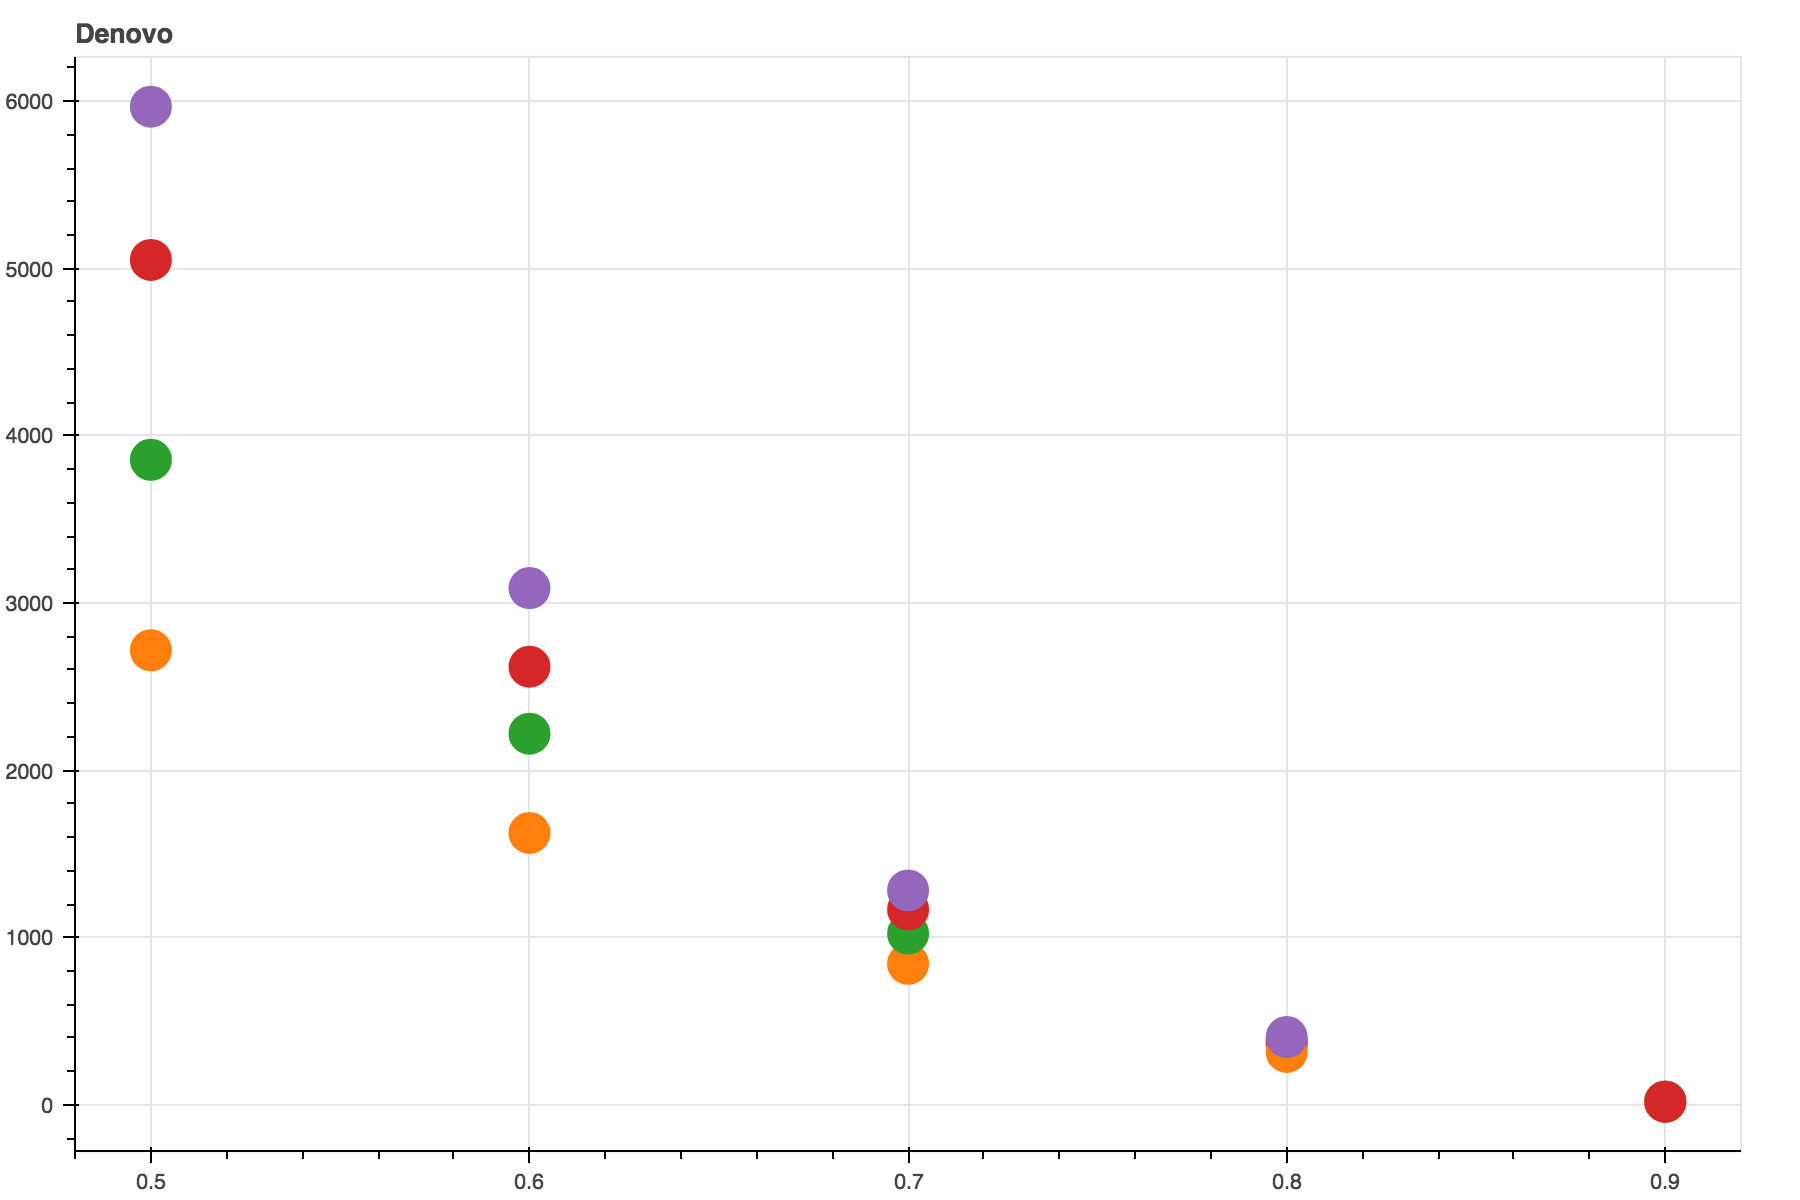

In [32]:
Image('images/bokeh_plot2.png')

In [33]:
p3=figure(title="Denovo", width=900, height=600)
p3.circle(vcf6['max_missing'],vcf6['number_kept'],color=vcf6['hw_pvalue'].apply(lambda x:d_palette[x]),size=20)


bokeh.models.renderers.GlyphRenderer(
    id='ad28d9b6-2d57-417a-b965-cfcdd44a67b2',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='518607c7-ebb5-4bc3-affe-bdc983577a82',
        callback=None,
        data={'fill_color': ['#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd'],
         'line_color': ['#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#ff7f0e',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#2ca02c',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#d62728',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd',
          '#9467bd'],
         'x': ['0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9',
          '0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9',
          '0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9',
          '0.5',
          '0.6',
          '0.7',
          '0.8',
          '0.9'],
         'y': ['2209',
          '1447',
          '843',
          '316',
          '19',
          '2905',
          '1893',
          '1024',
          '358',
          '19',
          '3774',
          '2293',
          '1168',
          '382',
          '19',
          '4690',
          '2763',
          '1282',
          '405',
          '20']},
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        selected=bokeh.models.selections.Selection(
            id='d6c09895-99eb-483f-a463-57b04a7a0c7c',
            indices=[],
            js_event_callbacks={},
            js_property_callbacks={},
            line_indices=[],
            multiline_indices={},
            name=None,
            subscribed_events=[],
            tags=[]),
        selection_policy=bokeh.models.selections.UnionRenderers(
            id='f81b9e22-5054-47ea-8388-254326e810aa',
            js_event_callbacks={},
            js_property_callbacks={},
            name=None,
            subscribed_events=[],
            tags=[]),
        subscribed_events=[],
        tags=[]),
    glyph=bokeh.models.markers.Circle(
        id='b0667aef-bf26-4c45-b67a-2e71e22ab2d8',
        angle={'units': 'rad', 'value': 0.0},
        fill_alpha={'value': 1.0},
        fill_color={'field': 'fill_color'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 1.0},
        line_cap='butt',
        line_color={'field': 'line_color'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension='x',
        size={'units': 'screen', 'value': 20},
        subscribed_events=[],
        tags=[],
        x={'field': 'x'},
        y={'field': 'y'}),
    hover_glyph=None,
    js_event_callbacks={},
    js_property_callbacks={},
    level='glyph',
    muted=False,
    muted_glyph=None,
    name=None,
    nonselection_glyph=bokeh.models.markers.Circle(
        id='eeff73c3-3b65-40a5-a39a-0ca31a1c2511',
        angle={'units': 'rad', 'value': 0.0},
        fill_alpha={'value': 0.1},
        fill_color={'value': '#1f77b4'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 0.1},
        line_cap='butt',
        line_color={'value': '#1f77b4'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension='x',
        size={'units': 'scr

In [35]:
#output_notebook()
#show(p3)

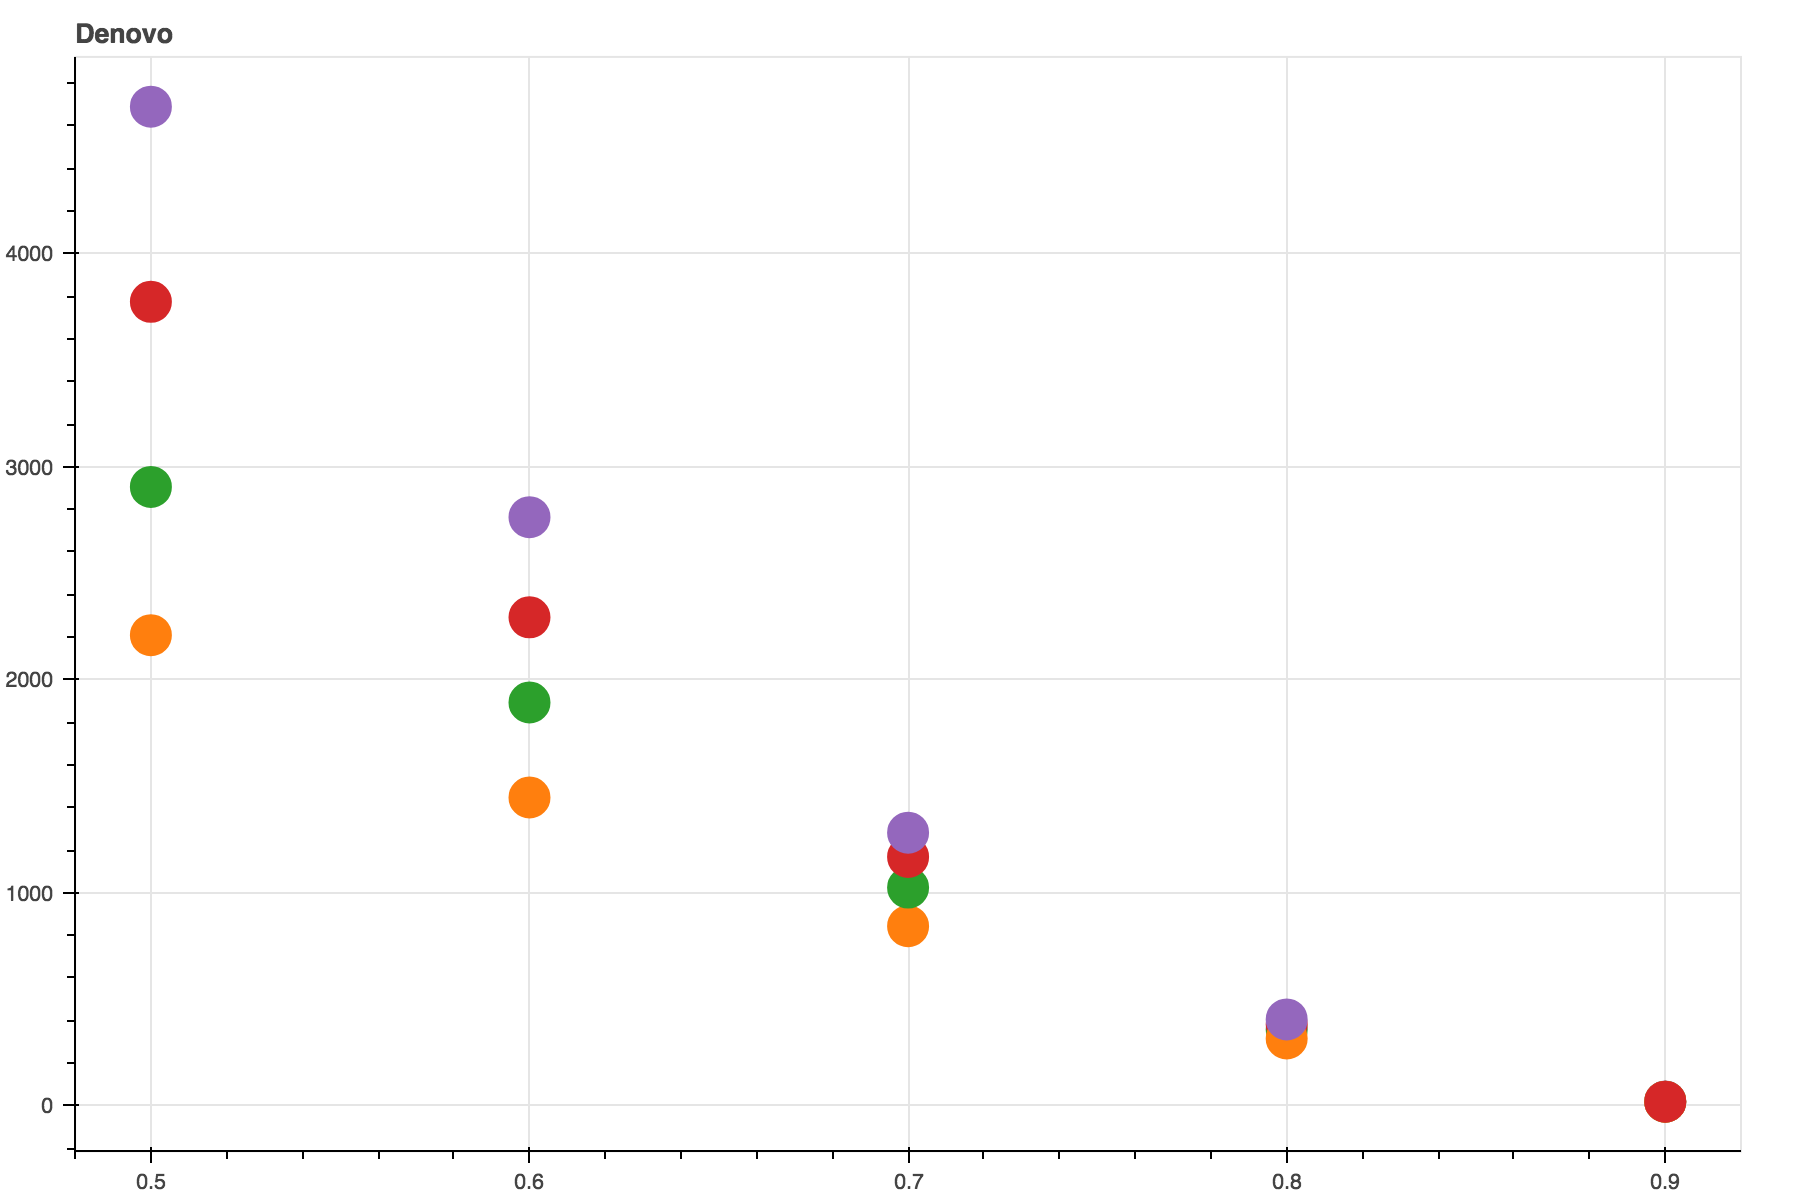

In [37]:
Image('images/bokeh_plot3.png')

### Vcf with chosen parameters

*input* used reference genome
populations.snps.vcf 

*code*

vcftools --vcf populations.snps.vcf --hwe 0.00001  --max-missing 0.8 --mac 4 --recode

*output* 

Parameters as interpreted:
        --vcf populations.snps.vcf
        --mac 4
        --max-alleles 2
        --hwe 1e-05
        --max-missing 0.8
        --recode

After filtering, kept 180 out of 180 Individuals
Outputting VCF file...
After filtering, kept 26131 out of a possible 258540 Sites
Run Time = 28.00 seconds

out.recode.vcf renamed to chosen.vcf

### vcf for just Europe sites

*input* reference genome populations.snps.vcf

*code*
vcftools --vcf populations.snps.vcf --hwe 0.00001 --max-missing 0.8 --mac 4 --remove Nam_names.txt --recode

*output*
Parameters as interpreted:
	--vcf populations.snps.vcf
	--remove Nam_names.txt
	--mac 4
	--max-alleles 2
	--hwe 1e-05
	--max-missing 0.8
	--recode

Excluding individuals in 'exclude' list
After filtering, kept 58 out of 180 Individuals
Outputting VCF file...
After filtering, kept 20843 out of a possible 258540 Sites

file:
out.recode.vcf renamed to chosen_eur.vcf

*input* reference genome populations.snps.vcf

*code* vcftools --vcf populations.snps.vcf --hwe 0.00001 --max-missing 0.8 --mac 4 --remove Eur_names.txt --recode

*output*
Parameters as interpreted:
        --vcf populations.snps.vcf
        --remove Eur_names.txt
        --mac 4
        --max-alleles 2
        --hwe 1e-05
        --max-missing 0.8
        --recode

Excluding individuals in 'exclude' list
After filtering, kept 122 out of 180 Individuals
Outputting VCF file...
After filtering, kept 28643 out of a possible 258540 Sites

*file* out.recode.vcf renamed to chosen_nam.vcf

## Convert from vcf to structure format

*program* PGDspider

*code* java -Xmx1024m -Xms512m -jar PGDSpider2.jar
run spider as gui using java
then put in chosen.vcf as input

*output* chosen.str

*Additional necessary edits to prepare for structure*

* remove 2nd column
* replace spaces with tabs 
* remove header row

### Convert from vcf to structure format and include population information

*program* PGDspider

*code* java -Xmx1024m -Xms512m -jar PGDSpider2.jar #to launch spider

run spider as gui using java then put in chosen.vcf as input
select with_pop as spid file which includes pop_only.txt with which individuals belong to each original population

*output* chosen_with_pops

## Structure

#### Output
| K     | Reps    | mean est. LnP(Data) | stdev est. LnP(Data)
| --- | --- | --- |
| 1   |  5      | -2047792.140000  | 140.191309 |
| 2    | 5      | -2014302.660000  | 1681.014073 | 
| 3    |  5 |        -1990272.340000  | 3612.639602 |
| 4    |   5 |       -1974484.980000 | 6217.666031 |
| 5    |   5 |      -1962378.500000 | 5923.185605 |
| 6    |   5 |      -2244338.780000 | 548458.344589 |

Most support for k=5

### Separate by continent

1. Generate separate vcf files for each continent
*input* original vcf file : populations.snps.vcf 
*code* 
For north american
vcftools --vcf populations.snps.vcf --hwe 0.00001  --max-missing 0.8 --mac 4 --remove Nam_names.txt --recode
For European
vcftools --vcf populations.snps.vcf --hwe 0.00001  --max-missing 0.8 --mac 4 --remove Eur_names.txt --recode

2. Merge tables in FSTs_vcf notebook. Table A: pop_map_.txt has the names of each sample with the population and continent they are from. Table B: sites.txt has the populations, continents and the lats and longs

3. Export two tables (one for each continent) with properly formatted sample names and their corresponding populations sorted by latitude (nam_pops_only, eur_pops_only)

4. Convert each vcf file from vcf to structure format using PGDspider 
Launch PGDspider: java -Xmx1024m -Xms512m -jar PGDSpider2.jar
*input* chosen_eur.vcf and chosen_nam.vcf
*spid* include a spid file that maps each sample to their population
*output* eur_with_pops and nam_with_pops

5. Run structure using strauto
*input* eur_with_pops.str / name_with_pops.str
*code* edit input.py file to include correct number of markers, individuals, runs etc
*run* using screen
*ouput* includes harvester file which has summary.txt and also result_f folder, which can be used for plotting

### Plot structure with R

See plot structure Eur. Rmd and plot structure Nam for R code to plot structure plots

## PCA of snps

1. Make vcf files for both continents with all the available markers (eur_all.vcf, nam_all.vcf)
2. Install R program LEA
source("https://bioconductor.org/biocLite.R")
biocLite("LEA")
3. Run pcas and Tracy–Widom

*program* 
R

*code*

vcf2geno("eur_all.vcf", output.file = "eur_test.geno", force = TRUE)

pc=pca("eur_test.geno", center = TRUE, scale = FALSE)

summary(pc)

tw=tracy.widom(pc)

plot(tw$percentage)

tw$pvalues

vcf2geno("nam_all.vcf", output.file = "nam.geno", force = TRUE)

pcn=pca ("nam.geno", center = TRUE, scale = FALSE)

summary(pcn)

twn=tracy.widom(pcn)

twn$pvalues    

#### TW p-values

Eur
1.013e-06 1.019e-01 9.848e-01 1.000e+00 1.000e+00 1.000e+00 1.000e+00
1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00


Nam
8.000e-09 8.000e-09 8.000e-09 8.000e-09 1.199e-07 1.209e-03 4.671e-02
6.880e-01 9.995e-01 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00

#### Perecent variation explained (as per Emily Josephs suggestion)

Europe
PC1  0.04469
Total  0.04469

North America
PC1 0.03104
PC2 0.0252
PC3 0.02036
PC4 0.01883
PC5 0.01797
PC6 0.01661
PC7 0.01579

In [38]:
0.03104 + 0.0252 + 0.02036 + 0.01883+0.01797+0.01661+0.01579

0.1458

#### regressions
see PCAregressions.ipynb for steps and code

takeaway None are significant for either pca~latitude or pca~trait

In [39]:
###output
nam=pd.read_csv('data/namRegressions')
eur=pd.read_csv('data/eurRegressions')
eur

,X,y,R2,t,p
0,lat,pca1,0.000010,0.024091,0.980864
1,avg.ft,pca1,0.037953,-0.561782,0.589652
2,avg.ht,pca1,0.032790,-0.520778,0.616625
3,avg.bn,pca1,0.040075,-0.577913,0.579222


In [40]:
nam

,X,y,R2,t,p
0,lat,pca1,0.000003,0.019604,0.984393
1,lat,pca2,0.000122,0.119558,0.905038
2,lat,pca3,0.016773,1.412787,0.160373
3,lat,pca4,0.004812,-0.752162,0.453464
4,lat,pca5,0.001626,0.436564,0.663232
5,lat,pca6,0.002762,-0.569210,0.570305
6,lat,pca7,0.000543,-0.252165,0.801356
7,avg.ft,pca1,0.002000,-0.173370,0.864679
8,avg.ft,pca2,0.003449,-0.227854,0.822837
9,avg.ft,pca3,0.156863,1.670537,0.115541


### Population genetics analysis

*program* Genodive 
*input* tried importing structure format, but kept crashing so tried various formats until converting from vcf to genetix using PGDspider and then loading into Genodive worked

#### Results

In [41]:
eur_div=pd.read_csv('data/Europe_diversity.txt',sep = "\s+|\t+|\s+\t+|\t+\s+", header=None,
                   names = ["Pop_num", "Pop_name", "Num", "Eff_num","Ho", "Hs", "Gis"])

/Users/brechann/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [42]:
eur_div

,Pop_num,Pop_name,Num,Eff_num,Ho,Hs,Gis
1,1,PG,1.555,1.262,0.135,0.189,0.288
2,1,LH,1.646,1.275,0.136,0.197,0.308
3,1,HK,1.508,1.265,0.137,0.191,0.279
4,1,HR,1.674,1.278,0.137,0.198,0.311
5,1,HJ,1.443,1.264,0.153,0.181,0.154
6,1,HB,1.359,1.231,0.112,0.183,0.389
7,1,HC,1.632,1.285,0.146,0.200,0.270
8,1,HS,1.624,1.276,0.144,0.196,0.265
9,1,SZ,1.495,1.265,0.131,0.190,0.310


In [43]:
eur_div.mean(axis=0)

Pop_num    1.000000
Num        1.548444
Eff_num    1.266778
Ho         0.136778
Hs         0.191667
Gis        0.286000
dtype: float64

In [44]:
eur_G=pd.read_csv('data/Europe_gstatistics.txt',sep = "\t")

In [45]:
eur_G

,Statistic,Value,Std.Dev.,c.i.2.5%,c.i.97.5%,Description
0,Num,2.000,0.000,2.000,2.000,Number of alleles
1,Eff_num,1.224,0.001,1.221,1.226,Effective number of alleles
2,Ho,0.137,0.001,0.136,0.138,Observed Heterozygosity
3,Hs,0.192,0.001,0.190,0.193,Heterozygosity Within Populations
4,Ht,0.202,0.001,0.200,0.204,Total Heterozygosity
5,H't,0.203,0.001,0.201,0.205,Corrected total Heterozygosity
6,Gis,0.285,0.002,0.281,0.289,Inbreeding coefficient
7,Gst,0.051,0.001,0.050,0.052,Fixation index
8,G'st(Nei),0.057,0.001,0.055,0.059,"Nei, corrected fixation index"
9,G'st(Hed),0.065,0.001,0.063,0.066,"Hedrick, standardised fixation index"


In [46]:
eur_Fst=pd.read_csv('data/Europe_fst.txt',sep = "\s+")

In [47]:
eur_Fst

,,,PG,LH,HK,HR,HJ,HB,HC,HS,SZ
1,1,PG,0.000,0.021,0.050,0.026,0.091,0.051,0.043,0.038,0.054
2,1,LH,0.021,0.000,0.035,0.018,0.083,0.034,0.035,0.030,0.047
3,1,HK,0.050,0.035,0.000,0.036,0.105,0.063,0.056,0.050,0.070
4,1,HR,0.026,0.018,0.036,0.000,0.080,0.037,0.039,0.028,0.046
5,1,HJ,0.091,0.083,0.105,0.080,0.000,0.120,0.099,0.092,0.114
6,1,HB,0.051,0.034,0.063,0.037,0.120,0.000,0.061,0.051,0.071
7,1,HC,0.043,0.035,0.056,0.039,0.099,0.061,0.000,0.046,0.063
8,1,HS,0.038,0.030,0.050,0.028,0.092,0.051,0.046,0.000,0.058
9,1,SZ,0.054,0.047,0.070,0.046,0.114,0.071,0.063,0.058,0.000


In [48]:
eur_Fst_list=[0.021, 0.050, 0.026, 0.091, 0.051, 0.043, 0.038, 0.054, 0.035, 0.018, 0.083, 0.034, 0.035, 
              0.030, 0.047,0.036, 0.105, 0.063, 0.056, 0.050, 0.070, 0.080, 0.037, 0.039, 0.028, 0.046,
              0.120, 0.099, 0.092, 0.114, 0.061, 0.051, 0.071, 0.046, 0.063, 0.058]

In [49]:
sum(eur_Fst_list)/len(eur_Fst_list)

0.05669444444444444

In [50]:
min(eur_Fst_list)

0.018

In [51]:
max(eur_Fst_list)

0.12

In [52]:
eur_amova=pd.read_csv('data/Europe_amova.txt',sep = "\s+")

In [53]:
eur_amova

,Source,of,Variation,Nested,in,%var,F-stat,F-value,Std.Dev.,c.i.2.5%,c.i.97.5%,P-value,F'-value
0,Within,Individual,--,0.728,F_it,0.272,0.002,0.269,0.275,--,--,NaN,NaN
1,Among,Individual,Population,0.234,F_is,0.243,0.002,0.240,0.247,0.001,--,NaN,NaN
2,Among,Population,--,0.038,F_st,0.038,0.001,0.037,0.039,0.001,0.047,NaN,NaN


In [54]:
eur_amova=eur_amova.drop("P-value", axis=1)

In [55]:
eur_amova=eur_amova.drop("F'-value", axis=1)

In [56]:
eur_amova.columns=["Source of Variaton", " ","Nested in", "%var", "F-stat","F-value", 
                   "Std.Dev.", "c.i.2.5%","c.i.97.5%", "Pvalue","F'value"]

In [57]:
eur_amova

,Source of Variaton,,Nested in,%var,F-stat,F-value,Std.Dev.,c.i.2.5%,c.i.97.5%,Pvalue,F'value
0,Within,Individual,--,0.728,F_it,0.272,0.002,0.269,0.275,--,--
1,Among,Individual,Population,0.234,F_is,0.243,0.002,0.240,0.247,0.001,--
2,Among,Population,--,0.038,F_st,0.038,0.001,0.037,0.039,0.001,0.047


In [58]:
nam_div=pd.read_csv('data/Nam_diversity.txt',sep = "\s+|\t+|\s+\t+|\t+\s+", header=None,
                   names = ["Pop_num", "Pop_name", "Num", "Eff_num","Ho", "Hs", "Gis"])

/Users/brechann/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [59]:
nam_div

,Pop_num,Pop_name,Num,Eff_num,Ho,Hs,Gis
1,1,VN,1.316,1.179,0.098,0.126,0.216
2,1,MF,1.469,1.203,0.108,0.149,0.270
3,1,HL,1.386,1.197,0.102,0.142,0.284
4,1,BP,1.371,1.193,0.121,0.126,0.046
5,1,WV,1.544,1.210,0.113,0.151,0.252
6,1,PA,1.490,1.204,0.115,0.146,0.212
7,1,AV,1.358,1.189,0.111,0.125,0.112
8,1,PR,1.487,1.203,0.100,0.144,0.303
9,1,SU,1.417,1.191,0.104,0.139,0.249
10,1,CB,1.497,1.197,0.112,0.144,0.224


In [60]:
nam_div.mean(axis=0)

Pop_num    1.000000
Num        1.449765
Eff_num    1.195529
Ho         0.108235
Hs         0.140412
Gis        0.224471
dtype: float64

In [61]:
nam_G=pd.read_csv('data/Nam_gstatistics.txt',sep = "\t")

In [62]:
nam_G

,Statistic,Value,Std.Dev.,c.i.2.5%,c.i.97.5%,Description
0,Num,2.000,0.000,2.000,2.000,Number of alleles
1,Eff_num,1.163,0.001,1.161,1.165,Effective number of alleles
2,Ho,0.108,0.001,0.107,0.110,Observed Heterozygosity
3,Hs,0.141,0.001,0.140,0.142,Heterozygosity Within Populations
4,Ht,0.150,0.001,0.148,0.151,Total Heterozygosity
5,H't,0.150,0.001,0.149,0.152,Corrected total Heterozygosity
6,Gis,0.230,0.001,0.228,0.233,Inbreeding coefficient
7,Gst,0.061,0.001,0.060,0.062,Fixation index
8,G'st(Nei),0.064,0.001,0.063,0.065,"Nei, corrected fixation index"
9,G'st(Hed),0.071,0.001,0.070,0.072,"Hedrick, standardised fixation index"


In [63]:
nam_Fst=pd.read_csv('data/Nam_fst.txt',sep = "\s+")

In [64]:
nam_Fst

,Statistic,VN,MF,HL,BP,WV,PA,AV,PR,SU,CB,MI,FL,SD,PS,DH,IH,WC
0,VN,--,0.061,0.101,0.180,0.078,0.082,0.180,0.089,0.093,0.075,0.073,0.061,0.130,0.085,0.086,0.066,0.063
1,MF,0.061,--,0.033,0.118,0.020,0.018,0.116,0.031,0.029,0.017,0.018,0.022,0.049,0.027,0.020,0.007,0.015
2,HL,0.101,0.033,--,0.154,0.051,0.052,0.149,0.059,0.061,0.049,0.050,0.054,0.092,0.057,0.053,0.040,0.047
3,BP,0.180,0.118,0.154,--,0.131,0.131,0.213,0.137,0.145,0.129,0.139,0.130,0.188,0.145,0.139,0.117,0.122
4,WV,0.078,0.020,0.051,0.131,--,0.034,0.125,0.044,0.038,0.024,0.019,0.026,0.049,0.030,0.043,0.020,0.020
5,PA,0.082,0.018,0.052,0.131,0.034,--,0.125,0.043,0.043,0.033,0.032,0.035,0.068,0.044,0.042,0.021,0.029
6,AV,0.180,0.116,0.149,0.213,0.125,0.125,--,0.133,0.135,0.124,0.129,0.121,0.171,0.137,0.136,0.112,0.114
7,PR,0.089,0.031,0.059,0.137,0.044,0.043,0.133,--,0.051,0.040,0.039,0.042,0.072,0.049,0.053,0.031,0.036
8,SU,0.093,0.029,0.061,0.145,0.038,0.043,0.135,0.051,--,0.035,0.036,0.036,0.079,0.044,0.050,0.025,0.031
9,CB,0.075,0.017,0.049,0.129,0.024,0.033,0.124,0.040,0.035,--,0.009,0.009,0.046,0.020,0.043,0.015,0.007


In [65]:
nam_Fst_list=[0.061,0.101,0.180,0.078,0.082,0.180,0.089,0.093,0.075,0.073,0.061,0.130,0.085,0.086, 
              0.066, 0.063,0.033,0.118,0.020,0.018,0.116,0.031,0.029,0.017,0.018,0.022,0.049,0.027,
              0.020,0.007,0.015,0.154, 0.051,0.052, 0.149,0.059,0.061,0.049,0.050,0.054,0.092,
              0.057,0.053,0.040,0.047,0.131,0.131,0.213,0.137,0.145,0.129,0.139,0.130,0.188,
              0.145,0.139,0.117,0.122,0.034,0.125,0.044,0.038,0.024,0.019,0.026,0.049,0.030,
              0.043,0.020,0.020,0.125,0.043,0.043,0.033,0.032,0.035,0.068,0.044,0.042,0.021,0.029,
             0.133,0.135,0.124,0.129,0.121,0.171,0.137,0.136,0.112,0.114,0.051,0.040,0.039,0.042,
              0.072,0.049,0.053,0.031,0.036,0.035,0.036,0.036,0.079,0.044,0.050,0.025,0.031,
             0.009,0.009,0.046,0.020,0.043,0.015,0.007,0.010,0.041,0.011,0.042,0.016,0.003,
             0.040,0.017,0.041,0.017,0.006,0.054,0.071,0.047,0.036,0.048,0.025,0.012,0.031,
              0.037,0.009]

In [66]:
sum(nam_Fst_list)/len(nam_Fst_list)

0.06388235294117645

In [67]:
min(nam_Fst_list)

0.003

In [68]:
max(nam_Fst_list)

0.213

In [69]:
nam_amova=pd.read_csv('data/Nam_amova.txt',sep = "\s+", header=None)

In [70]:
nam_amova.columns=["Source of Variaton", " ","Nested in", "%var", "F-stat","F-value", 
                   "Std.Dev.", "c.i.2.5%","c.i.97.5%", "Pvalue","F'value"]

In [71]:
nam_amova

,Source of Variaton,,Nested in,%var,F-stat,F-value,Std.Dev.,c.i.2.5%,c.i.97.5%,Pvalue,F'value
0,Within,Individual,-,0.759,F_it,0.241,0.001,0.239,0.243,-,-
1,Among,Individual,Population,0.194,F_is,0.204,0.001,0.202,0.206,0.001,-
2,Among,Population,-,0.047,F_st,0.047,0.000,0.046,0.048,0.001,0.055


### Neighbornet

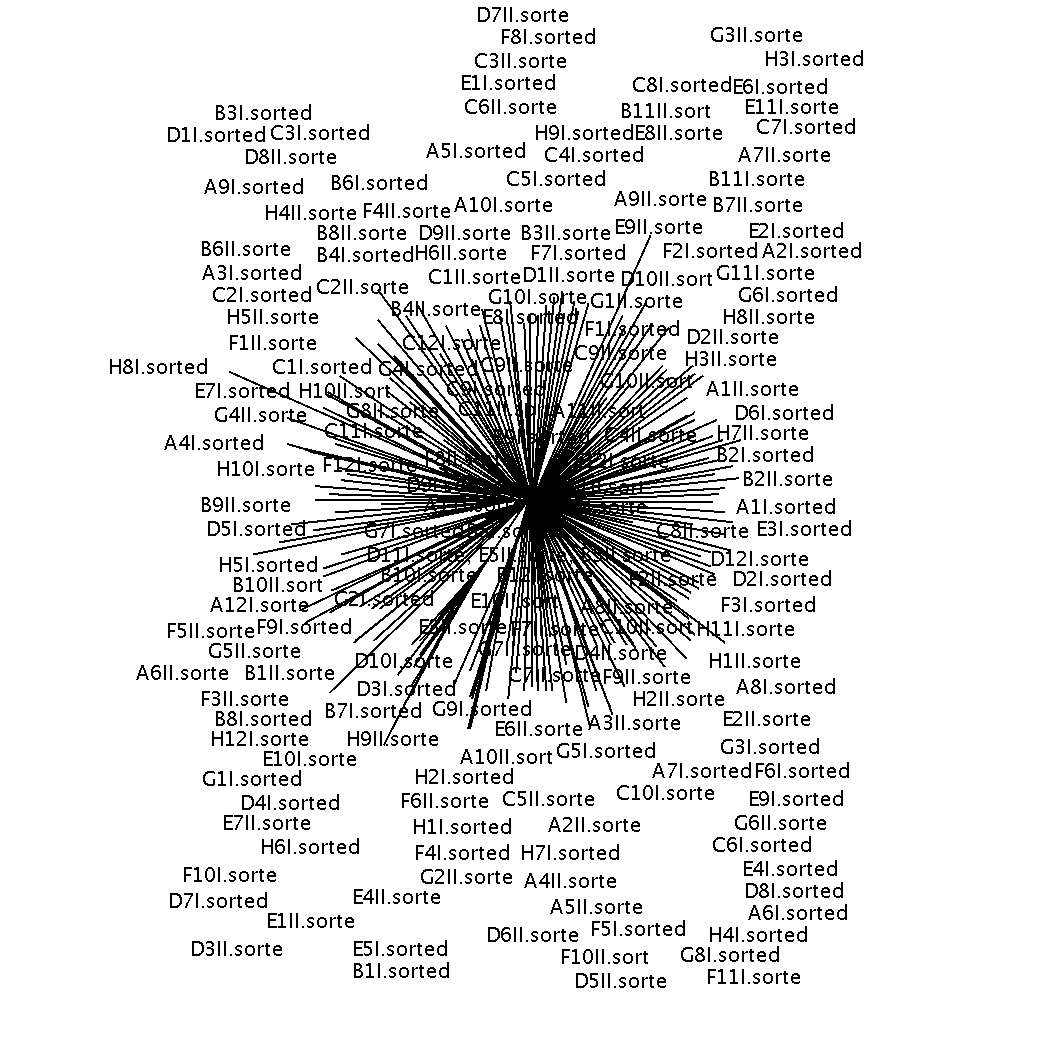

In [72]:
Image('images/neighbornet.png')

In [73]:
nam_G

,Statistic,Value,Std.Dev.,c.i.2.5%,c.i.97.5%,Description
0,Num,2.000,0.000,2.000,2.000,Number of alleles
1,Eff_num,1.163,0.001,1.161,1.165,Effective number of alleles
2,Ho,0.108,0.001,0.107,0.110,Observed Heterozygosity
3,Hs,0.141,0.001,0.140,0.142,Heterozygosity Within Populations
4,Ht,0.150,0.001,0.148,0.151,Total Heterozygosity
5,H't,0.150,0.001,0.149,0.152,Corrected total Heterozygosity
6,Gis,0.230,0.001,0.228,0.233,Inbreeding coefficient
7,Gst,0.061,0.001,0.060,0.062,Fixation index
8,G'st(Nei),0.064,0.001,0.063,0.065,"Nei, corrected fixation index"
9,G'st(Hed),0.071,0.001,0.070,0.072,"Hedrick, standardised fixation index"


In [74]:
eur_G

,Statistic,Value,Std.Dev.,c.i.2.5%,c.i.97.5%,Description
0,Num,2.000,0.000,2.000,2.000,Number of alleles
1,Eff_num,1.224,0.001,1.221,1.226,Effective number of alleles
2,Ho,0.137,0.001,0.136,0.138,Observed Heterozygosity
3,Hs,0.192,0.001,0.190,0.193,Heterozygosity Within Populations
4,Ht,0.202,0.001,0.200,0.204,Total Heterozygosity
5,H't,0.203,0.001,0.201,0.205,Corrected total Heterozygosity
6,Gis,0.285,0.002,0.281,0.289,Inbreeding coefficient
7,Gst,0.051,0.001,0.050,0.052,Fixation index
8,G'st(Nei),0.057,0.001,0.055,0.059,"Nei, corrected fixation index"
9,G'st(Hed),0.065,0.001,0.063,0.066,"Hedrick, standardised fixation index"


### References


Anderson, C. A., Pettersson, F. H., Clarke, G. M., Cardon, L. R., Morris, A. P., & Zondervan, K. T. (2010). Data quality control in genetic case-control association studies. Nature Protocols, 5(9), 1564–1573. http://doi.org/10.1038/nprot.2010.116

Beck, J. B., & Semple, J. C. (2015). Next-Generation Sampling: Pairing Genomics with Herbarium Specimens Provides Species-Level Signal in Solidago(Asteraceae). Applications in Plant Sciences, 3(6), 1500014–11.http://doi.org/10.3732/apps.1500014

Huang, Y.-F., Poland, J. A., Wight, C. P., Jackson, E. W., & Tinker, N. A. (2014). Using Genotyping-By-Sequencing (GBS) for Genomic Discovery in Cultivated Oat. PLoS ONE, 9(7), e102448–16. http://doi.org/10.1371/journal.pone.0102448

Ilut, D. C., Sanchez, P. L., Costich, D. E., Friebe, B., Coffelt, T. A., Dyer, J. M., et al. (2015). Genomic diversity and phylogenetic relationships in the genus Parthenium (Asteraceae). Industrial Crops and Products, 76, 920–929. http://doi.org/10.1016/j.indcrop.2015.07.035

Linck, E. B., & Battey, C. J. (2017). Minor allele frequency thresholds strongly affect population structure inference with genomic datasets. bioRxiv, 1–26. http://doi.org/10.1101/188623

Martin, M. D., Olsen, M. T., Samaniego, J. A., Zimmer, E. A., & Gilbert, M. T. P. (2016). The population genomic basis of geographic differentiation in North American common ragweed (Ambrosia artemisiifolia L.). Ecology and Evolution. http://doi.org/10.1002/ece3.2143

McGrath, K. 2007.Investigating the North American Crepis (Asteraceae) agamic complex for evidence of homoploid hybridization using next-generation sequencing techniques. Thesis 

Mondon, A., Owens, G. L., Poverene, M., Cantamutto, M., & Rieseberg, L. H. (2017). Gene flow in Argentinian sunflowers as revealed by genotyping-by-sequencing data. Evolutionary Applications, 11(2), 193–204. http://doi.org/10.1111/eva.12527

Sawler, J., Stout, J. M., Gardner, K. M., Hudson, D., Vidmar, J., Butler, L., et al. (2015). The Genetic Structure of Marijuana and Hemp. PLoS ONE, 10(8), e0133292. http://doi.org/10.1371/journal.pone.0133292

Taylor, S. A., Curry, R. L., White, T. A., Ferretti, V., & Lovette, I. (2014). Spatiotemporally consistent genomic signatures of reproductive isolation in a moving hybrid zone. Evolution, 68(11), 3066–3081. http://doi.org/10.1111/evo.12510

### Appendix

In [84]:

# 1 - Initialize list containing your 'macs'
macs = []
# 2 - Initialize list containing your 'hwes'
hwes = []
#3 - Initialize list containing your 'max-missing'
maxmiss=[]
#4 - Initialize list containing your 'max-missing'
kept=[]


In [85]:
# Opening file for reading. The path of the file is given in argument
open_file = open('all_vcf_denovo_old.txt', 'r')

In [86]:
for line in open_file:
    # 'line' is a line in your file

    # We make sure that 'line' is non-empty
    if line:
        # for each line in your file, we read something like this: 
        # subject---marks
        # We need to split the different information, which are separated by '---'
        information = line.split()

        # 'information' is an array containing 2 values:
        # 'information[0]' contains the subject
        # 'information[1]' contains the mark

        # We store each separate information in our arrays 'subjects' and 'marks':
        macs.append(information[16])
        hwes.append(information[20])
        maxmiss.append(information[22])
        kept.append(information[38])
        

# When finishing reading the file, we close it    
open_file.close()


In [87]:
vcf_output = pd.DataFrame(
    {'minor_allele_count': macs,
     'hw_pvalue': hwes,
     'max_missing': maxmiss,
     'number_kept': kept 
    })

In [88]:
#vcf_output

In [89]:
vcf3=vcf_output[vcf_output["minor_allele_count"]=="3"]

In [90]:
vcf4=vcf_output[vcf_output["minor_allele_count"]=="4"]

In [91]:
vcf5=vcf_output[vcf_output["minor_allele_count"]=="5"]

In [92]:
vcf3=vcf_output[vcf_output["minor_allele_count"]=="3"]

In [93]:
vcf001=vcf_output[vcf_output["hw_pvalue"]=="0.001"]

In [94]:
vcf01=vcf_output[vcf_output["hw_pvalue"]=="0.01"]

In [95]:
vcf05=vcf_output[vcf_output["hw_pvalue"]=="0.05"]

In [96]:
vcf1=vcf_output[vcf_output["hw_pvalue"]=="0.1"]

In [97]:
palette=Category10[7]
d_palette={'0.001':palette[1],'0.01':palette[2],'0.05':palette[3],'0.1':palette[4]}

In [98]:
vcf3.dtypes

hw_pvalue             object
max_missing           object
minor_allele_count    object
number_kept           object
dtype: object

In [99]:
p=figure(title="Denovo", width=900, height=600)
p.circle(vcf3['max_missing'],vcf3['number_kept'],color=vcf3['hw_pvalue'].apply(lambda x:d_palette[x]),size=20)


GlyphRenderer(id='d2db43a6-028d-4d94-9471-5e1c27b41fca', ...)

In [100]:
output_notebook()
show(p)

Loading BokehJS ...

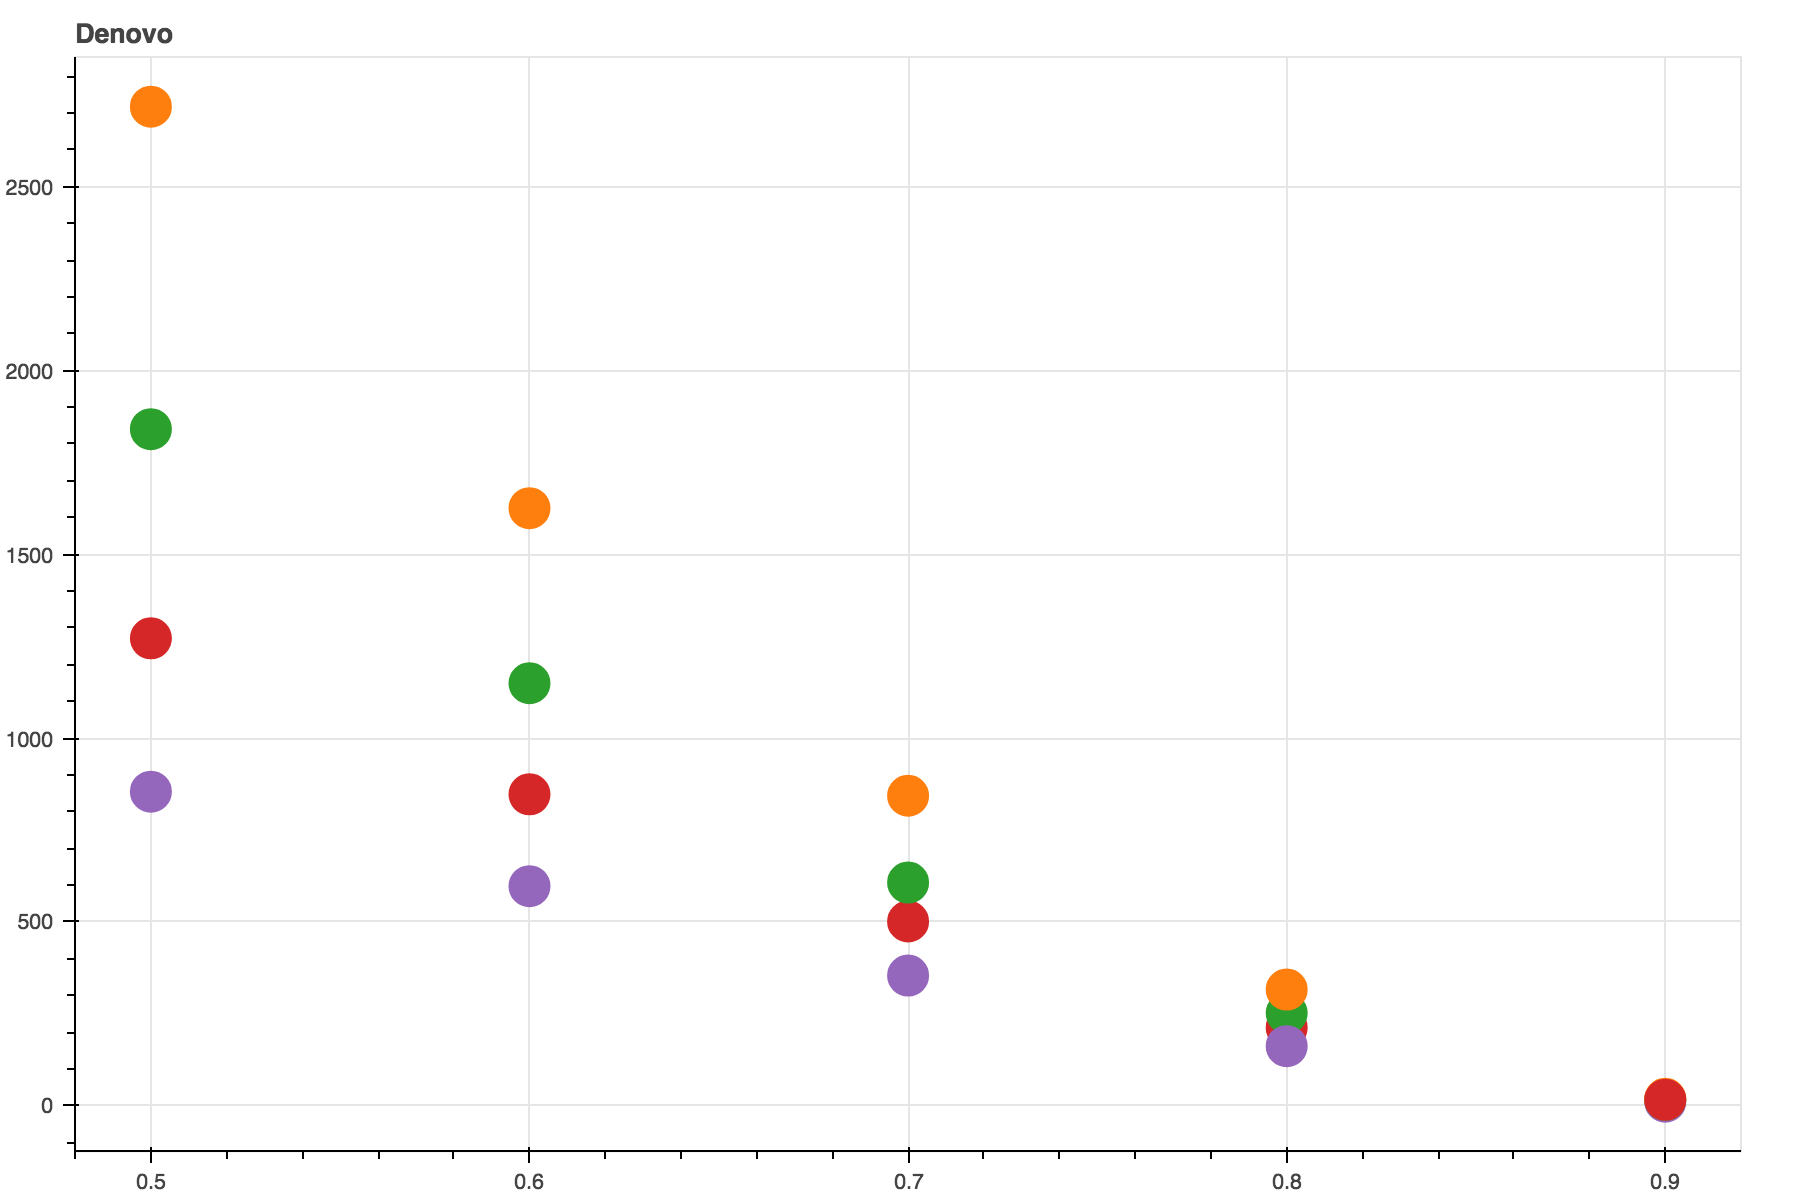

In [139]:
Image('bokeh_plot4.png')